## Load data

In [1]:
import numpy as np
import _pickle as pkl
import torch
import torch.nn as nn
from torchvision import transforms
%matplotlib inline 
import matplotlib.pyplot as plt
import os, sys, time
sys.path.append('../..')
from utils import set_seed_torch, rgb2gray
set_seed_torch(3)
from argparse import Namespace
import json
from utils import load_models, load_vh_models, frame_stack

In [2]:
class ObjectView(object):
    def __init__(self, d): self.__dict__ = d
        
args = ObjectView({'res': 64,
 'dataset_path': '/home/olimoyo/visual-haptic-dynamics/experiments/data/datasets/{}'
                   .format("visual_haptic_2D_len16_osc_withGT_8C12919B740845539C0E75B5CBAF7965.pkl"),
 'models_dir': '/home/olimoyo/visual-haptic-dynamics/saved_models/{}'
                   .format("vaughan/osc"),
 'device': 'cuda:0',
 'n_examples': 5,
 'n_pred': 8,
})

def load_models_dir(models_dir):
    """Load hyperparameters from trained model."""
    dict_of_models = {}
    for filedir in os.listdir(models_dir):
        fullpath = os.path.join(models_dir, filedir)
        if os.path.isdir(fullpath):
            with open(os.path.join(fullpath, 'hyperparameters.txt'), 'r') as fp:
                dict_of_models[fullpath] = Namespace(**json.load(fp))
    return dict_of_models

In [3]:
with open(args.dataset_path, 'rb') as f:
    raw_data = pkl.load(f)

data = {}
data['img_rgb'] = torch.from_numpy(raw_data["img"].transpose(0, 1, 4, 2, 3)).int().to(device=args.device)
data['img_gray'] = torch.from_numpy(rgb2gray(raw_data["img"]).transpose(0, 1, 4, 2, 3)).float().to(device=args.device)
data['haptic'] = torch.from_numpy(raw_data['ft']).float().to(device=args.device) / 100.0
data['arm'] = torch.from_numpy(raw_data['arm']).float().to(device=args.device)

actions = torch.from_numpy(raw_data["action"]).to(device=args.device).float()

## Visualize

Loading models in path:  /home/olimoyo/visual-haptic-dynamics/saved_models/vaughan/osc/lm_ul_osc_vha_r0.95_kl0.95_lr3e4
MSE of predictions:  [19.473963  6.554805 13.0431   25.43838  36.6896   46.415543 56.585625
 56.060486]


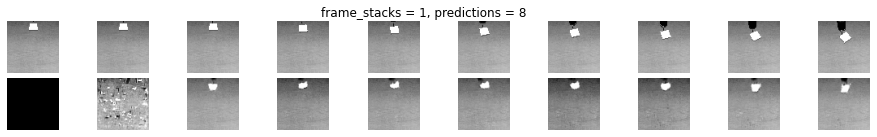

MSE of predictions:  [19.47131    3.3161025 14.357885  21.119604  23.870852  30.138504
 30.25661   35.459152 ]


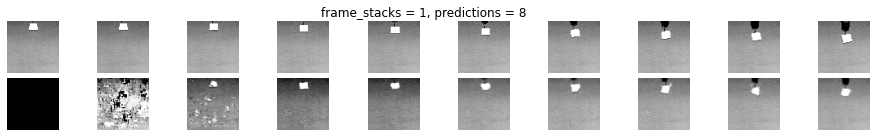

MSE of predictions:  [ 3.3362956  5.6177197 12.286002  16.561749  20.799694  25.998629
 32.32441   43.206623 ]


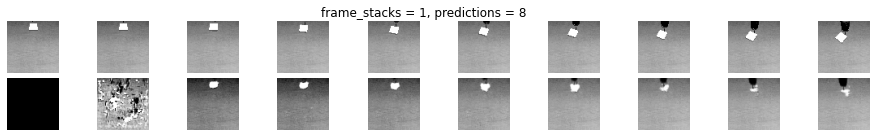

MSE of predictions:  [ 3.340399   6.803847   7.6077967 10.280957  13.957393  16.795897
 27.200771  45.581463 ]


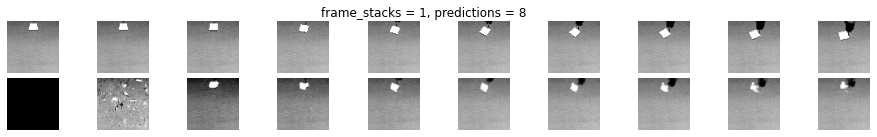

MSE of predictions:  [ 2.8574686  8.299153   8.6585    14.322164  20.24369   27.584084
 27.604889  37.33518  ]


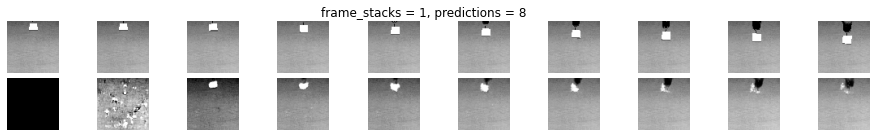

Loading models in path:  /home/olimoyo/visual-haptic-dynamics/saved_models/vaughan/osc/lm_ul_osc_v_r0.95_kl0.80_lr3e3
MSE of predictions:  [ 9.146352 15.486313 15.44505  14.884623 23.672302 25.90031  32.87362
 48.414623]


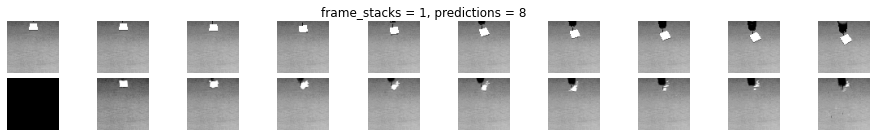

MSE of predictions:  [ 6.3579435 11.766551  14.582017  20.73825   25.603384  26.872826
 30.966309  40.902702 ]


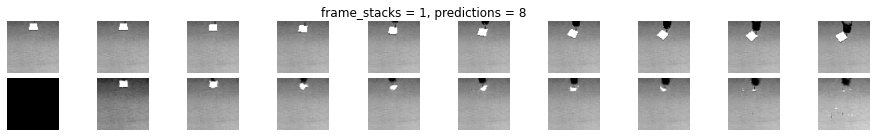

MSE of predictions:  [ 4.964331 10.730579 15.464726 20.908487 22.223524 26.60901  34.82949
 47.709896]


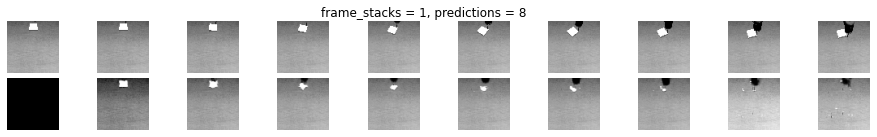

MSE of predictions:  [ 2.4150245  5.982701   9.582756   9.62266   14.575225  14.754457
 16.448685  15.890205 ]


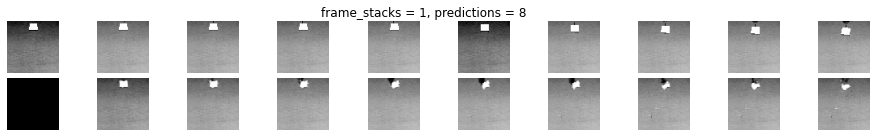

MSE of predictions:  [ 2.2299275  6.0409784  8.856751  10.111574  13.3935175 15.033561
 13.802153  19.754011 ]


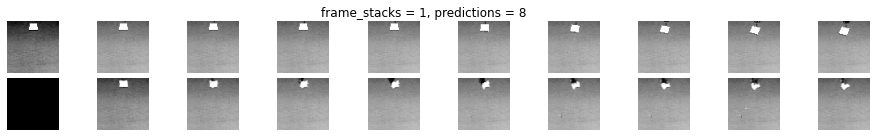

Loading models in path:  /home/olimoyo/visual-haptic-dynamics/saved_models/vaughan/osc/lm_ul_osc_v_r1.50_kl1.00_lr3e4
MSE of predictions:  [12.471766   7.92674    6.1320677 15.953253  20.92025   26.57162
 33.139706  34.21911  ]


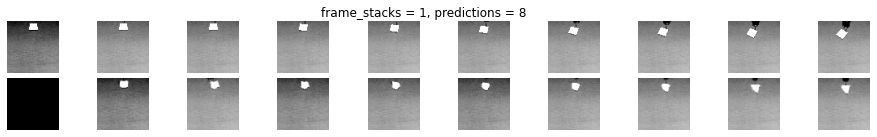

MSE of predictions:  [13.777613  7.661605  9.666323 17.9459   26.9523   35.98501  41.626328
 46.369026]


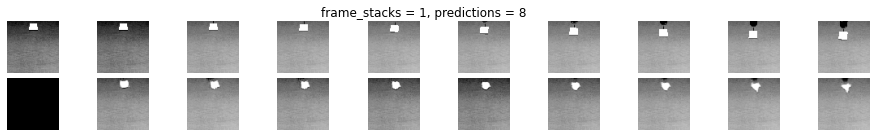

MSE of predictions:  [13.100179  7.425862  8.413754 17.211468 21.738825 27.761677 32.163876
 46.52605 ]


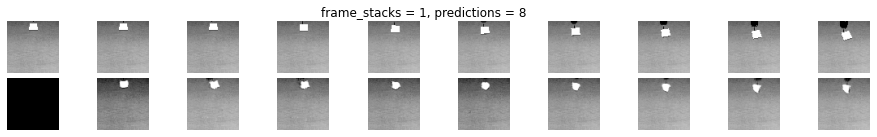

MSE of predictions:  [13.490935  8.196575 10.286288 14.341935 19.06016  27.583155 35.7006
 44.98623 ]


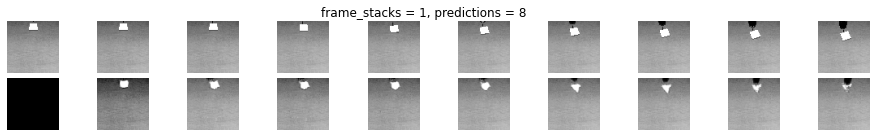

MSE of predictions:  [12.285938 11.617179  6.015773 14.83436  18.869371 25.430992 25.058344
 26.799992]


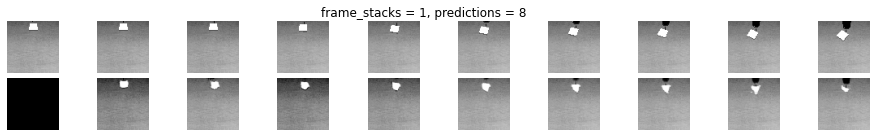

Loading models in path:  /home/olimoyo/visual-haptic-dynamics/saved_models/vaughan/osc/lm_ul_osc_vha_r0.95_kl0.80_lr3e4
MSE of predictions:  [ 1.7067071  6.029515   8.805341   7.920352   8.263125  12.529933
 11.786804  20.548555 ]


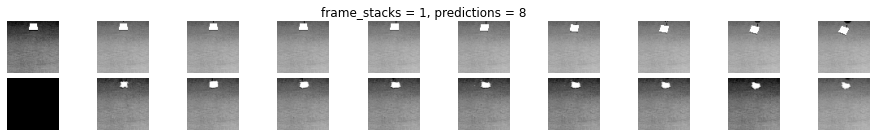

MSE of predictions:  [ 2.2266665  6.828146   7.82217   17.998894  29.526228  29.719603
 24.62839   28.846867 ]


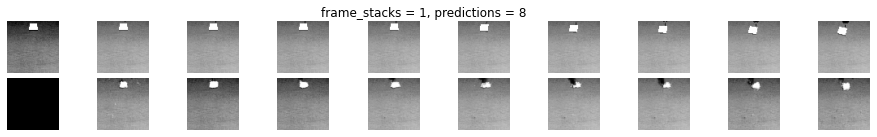

MSE of predictions:  [ 1.9778932  7.2920575 12.513304  10.390334   9.179358   7.8186054
 10.6712675 17.996561 ]


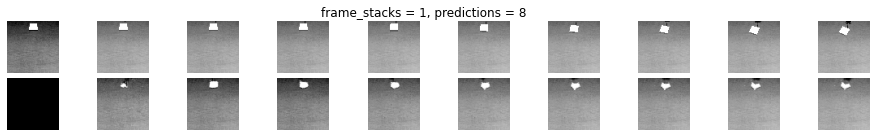

MSE of predictions:  [ 2.1919978  6.423199  10.43341    8.327749   6.91286    8.472879
 12.507973  17.148676 ]


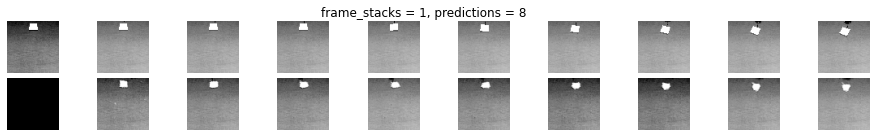

MSE of predictions:  [ 1.8999879  6.099105   6.632067   7.2307606  6.939031   8.398909
 14.076632  18.637466 ]


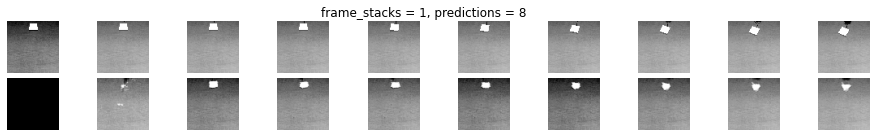

Loading models in path:  /home/olimoyo/visual-haptic-dynamics/saved_models/vaughan/osc/lm_ul_osc_v_r0.95_kl0.95_lr3e4
MSE of predictions:  [ 3.7690547  8.585055   8.254625  14.956327  21.716944  28.584867
 31.20578   32.72019  ]


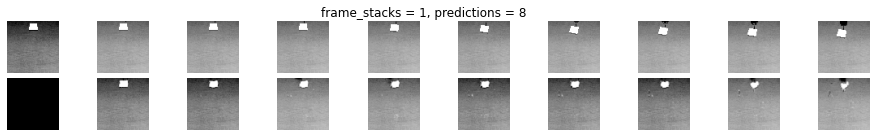

MSE of predictions:  [ 4.910307 10.043721 11.609379 17.24228  21.981262 24.385422 26.640371
 28.757935]


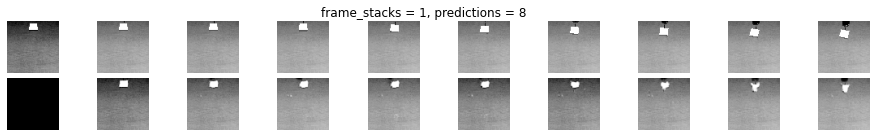

MSE of predictions:  [ 3.644413  9.234596  8.846106 15.022304 17.769493 18.734474 20.033737
 22.764593]


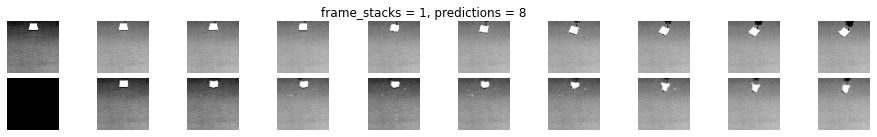

MSE of predictions:  [ 2.578563   7.5335097  8.026341  16.451523  19.113384  26.061466
 24.318502  28.930805 ]


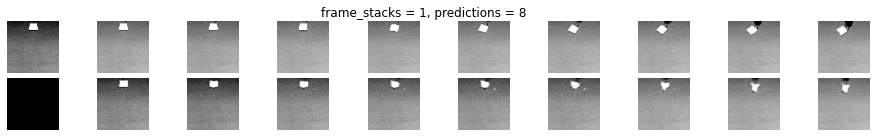

MSE of predictions:  [ 3.6867225  7.4309726  9.170673  13.392027  15.181716  15.226155
 19.024618  21.793745 ]


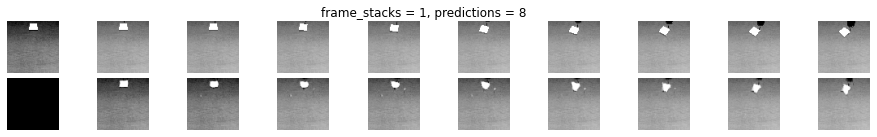

Loading models in path:  /home/olimoyo/visual-haptic-dynamics/saved_models/vaughan/osc/lm_ul_osc_vha_r0.95_kl0.95_lr3e3
MSE of predictions:  [ 4.3084598 13.142731  27.530687  41.701996  57.156776  66.48017
 79.672966  92.75319  ]


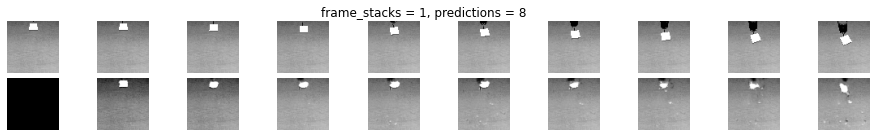

MSE of predictions:  [ 2.523458   8.683673   7.5264087 25.933674  37.91088   42.87898
 38.49097   32.23295  ]


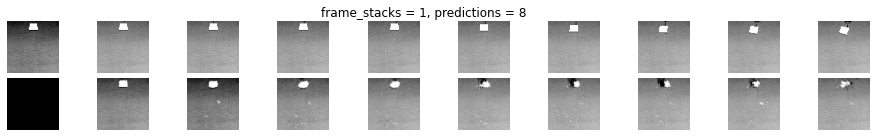

MSE of predictions:  [ 2.1163023  7.2682614  8.279005  10.327065  16.371506  19.919363
 20.790407  21.598976 ]


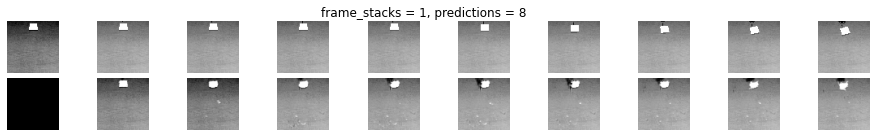

MSE of predictions:  [ 2.3782935  7.6210837 30.1765    40.850872  44.221485  43.602337
 37.788406  36.65201  ]


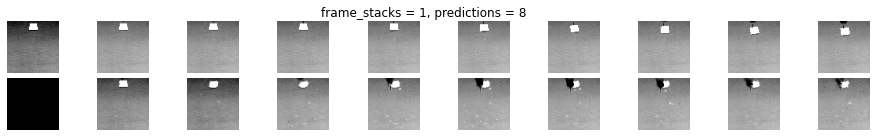

MSE of predictions:  [ 2.8537567  6.9755425 12.345048  24.216751  30.813427  35.582546
 34.6935    35.61798  ]


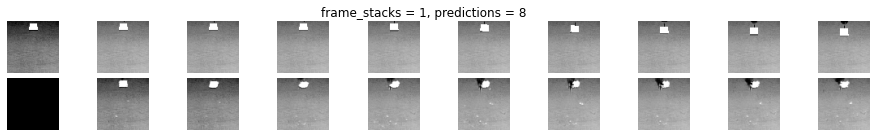

Loading models in path:  /home/olimoyo/visual-haptic-dynamics/saved_models/vaughan/osc/lm_ul_osc_vha_r0.95_kl0.80_lr3e3
MSE of predictions:  [ 7.7272573  5.2829733 14.042731  22.786533  31.642149  52.364464
 57.28611   67.92911  ]


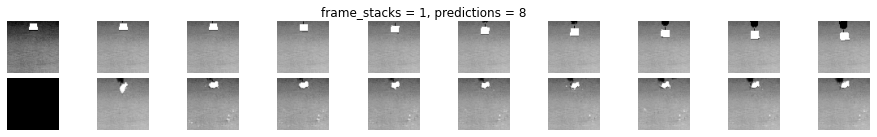

MSE of predictions:  [48.601536 30.896292 26.925325 30.327234 39.33562  42.92787  31.370766
 31.306944]


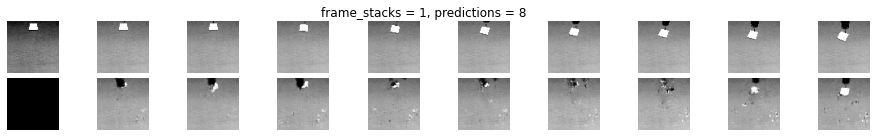

MSE of predictions:  [ 9.621445 24.523167 20.955154 40.99769  41.950768 48.793716 40.270382
 40.54856 ]


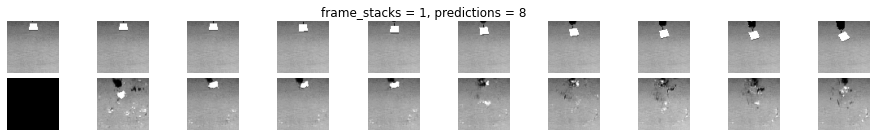

MSE of predictions:  [48.03867  51.443825 49.741283 52.99308  41.893925 51.550613 46.520714
 49.575478]


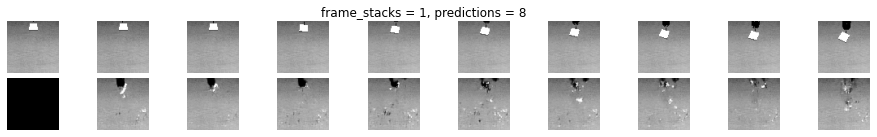

MSE of predictions:  [13.162211 17.771244 20.448252 23.004152 33.99165  21.119066 25.018604
 36.069214]


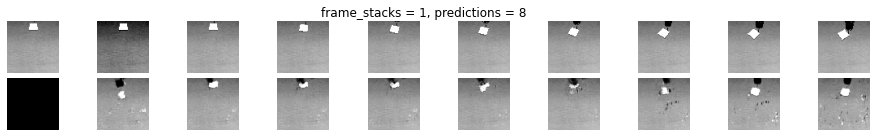

Loading models in path:  /home/olimoyo/visual-haptic-dynamics/saved_models/vaughan/osc/lm_ul_osc_v_r0.95_kl0.95_lr3e3
MSE of predictions:  [10.162984 11.912173 16.938858 22.211308 27.636734 32.897083 44.115845
 46.38406 ]


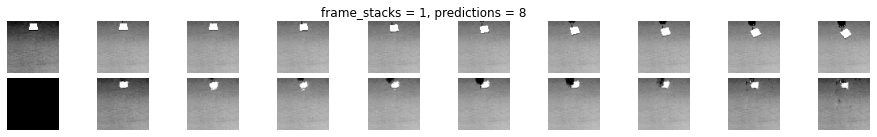

MSE of predictions:  [11.290568  10.8056965 11.4112425 17.09699   26.71852   37.638817
 51.519646  65.246216 ]


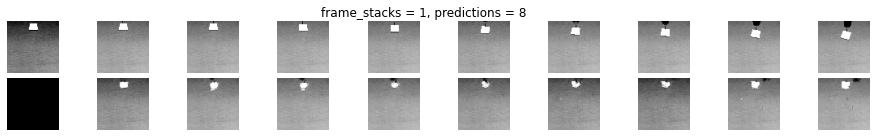

MSE of predictions:  [10.107846  8.797639 11.72832  18.194443 27.660643 39.118156 52.89993
 67.87569 ]


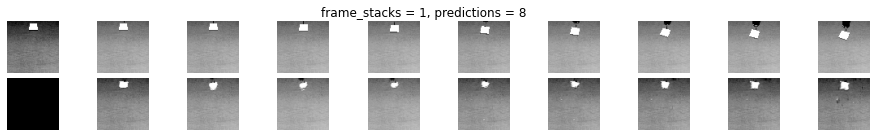

MSE of predictions:  [10.523496  8.631018 12.193032 22.137333 29.263584 38.734913 47.274418
 59.64974 ]


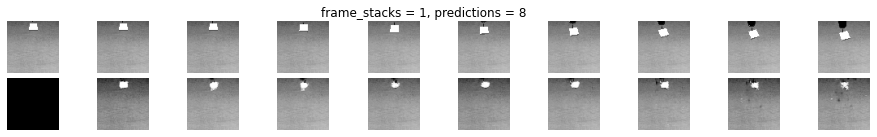

MSE of predictions:  [12.087576 11.322573  9.781767 20.034916 31.317375 44.416367 56.468796
 74.967155]


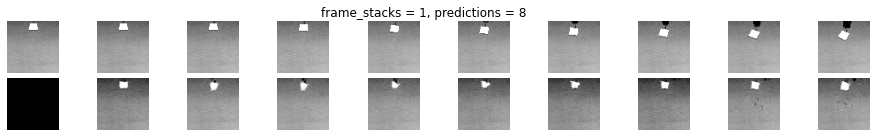

Loading models in path:  /home/olimoyo/visual-haptic-dynamics/saved_models/vaughan/osc/lm_ul_osc_v_r1.00_kl1.50_lr3e4
MSE of predictions:  [ 4.6445346 11.964378  22.580841  23.396843  18.614336  23.549799
 22.830744  31.344418 ]


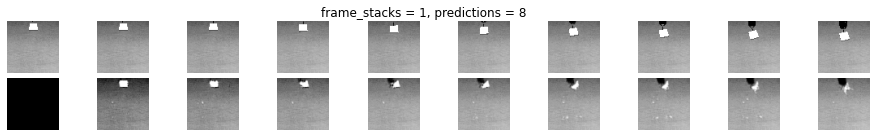

MSE of predictions:  [ 5.4942284 15.804013  18.771496  20.493723  22.570328  22.580065
 24.89291   29.670042 ]


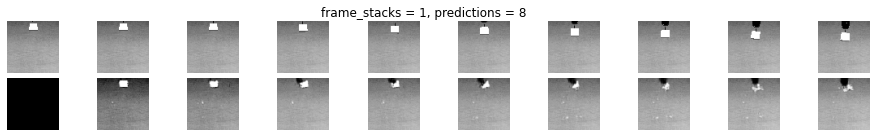

MSE of predictions:  [ 5.7911644 19.885443  26.322638  26.5241    26.69646   29.869587
 49.061924  58.63682  ]


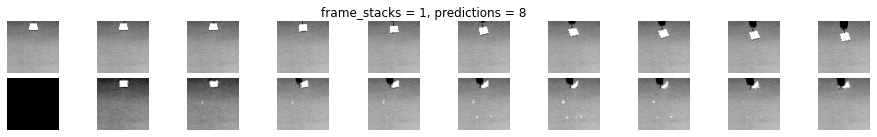

MSE of predictions:  [ 5.8465643 18.67381   24.614275  25.132523  30.341019  35.457417
 42.371113  38.185673 ]


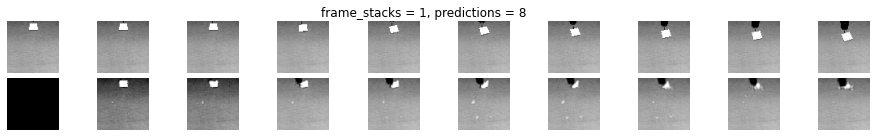

MSE of predictions:  [ 5.286317 14.691337 17.452559 17.639004 17.840342 21.165571 25.59457
 34.488895]


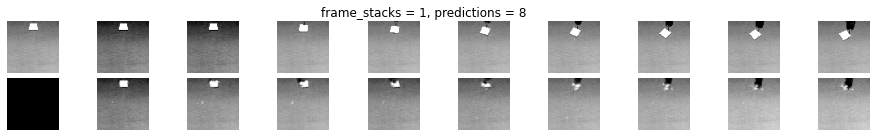

Loading models in path:  /home/olimoyo/visual-haptic-dynamics/saved_models/vaughan/osc/lm_ul_osc_vha_r1.50_kl1.00_lr3e3
MSE of predictions:  [286.80832 375.14435 230.418   191.87457 213.56407 194.0813  261.931
 316.25482]


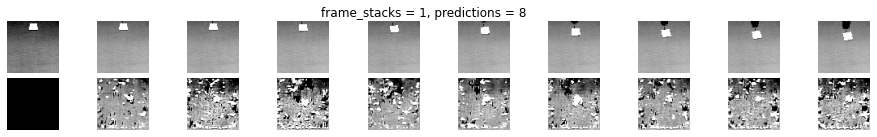

MSE of predictions:  [ 42.742313 108.2764   170.7352   347.60944  457.61005  483.9041
 424.13916  451.87967 ]


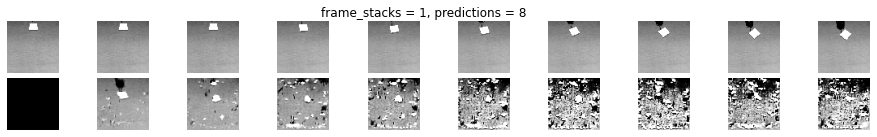

MSE of predictions:  [84.95152    7.6332855 26.055275  25.957647  23.585108  16.494894
 16.620218  33.9626   ]


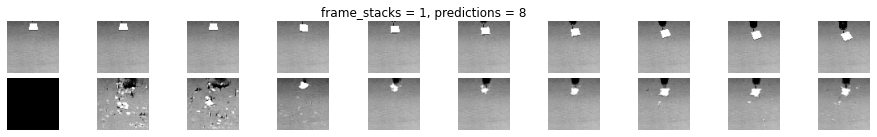

MSE of predictions:  [216.5758   220.79431  235.73798  195.8811   177.66606  134.91264
 105.80292   65.660614]


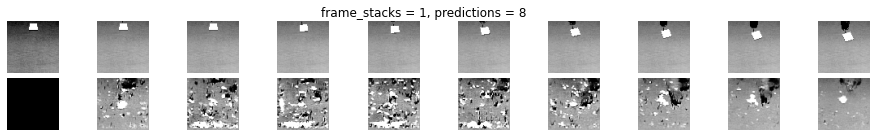

MSE of predictions:  [ 54.405186 253.87003  635.3294   275.9217   251.45377  254.82861
 199.35     189.98326 ]


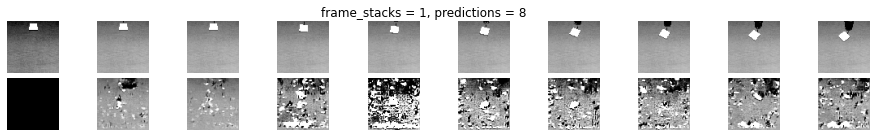

Loading models in path:  /home/olimoyo/visual-haptic-dynamics/saved_models/vaughan/osc/lm_ul_osc_v_r1.50_kl1.00_lr3e3
MSE of predictions:  [ 7.3594465 14.595151  17.004086  17.621908  16.463171  20.35677
 26.549984  23.895979 ]


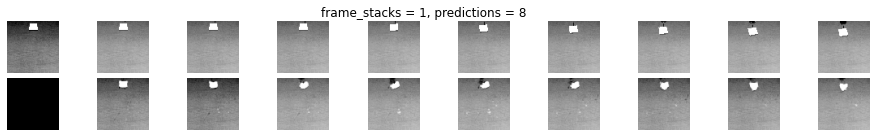

MSE of predictions:  [ 7.942526 18.795414 19.144417  8.826288 12.736811 18.96706  22.84354
 23.56018 ]


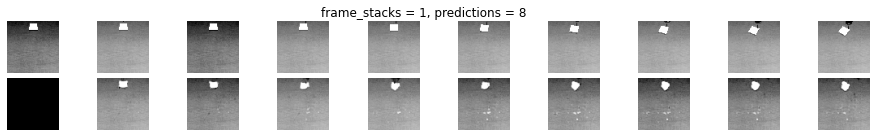

MSE of predictions:  [ 8.2365265 17.33875   13.827442  12.999389  12.369524  18.210602
 26.775263  29.422892 ]


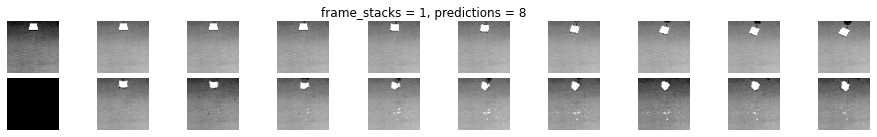

MSE of predictions:  [ 8.189936 15.691362 14.918194 12.412339 15.212737 23.201231 22.669487
 22.36734 ]


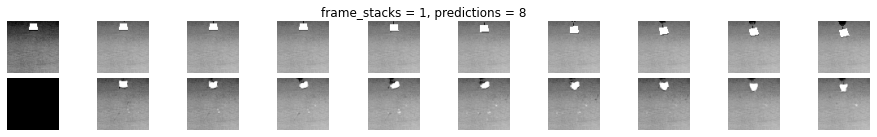

MSE of predictions:  [ 8.128092  17.107538   8.962377   7.1364937 18.357113  26.056067
 33.07701   34.21171  ]


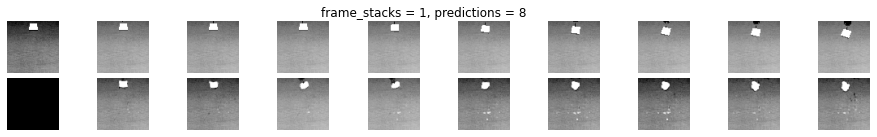

Loading models in path:  /home/olimoyo/visual-haptic-dynamics/saved_models/vaughan/osc/lm_ul_osc_vha_r1.00_kl1.50_lr3e3
MSE of predictions:  [192.80415  73.47861  67.05505 181.2869  324.26477 302.5277  505.86426
 631.53796]


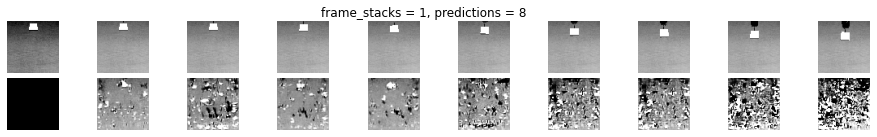

MSE of predictions:  [192.2174   124.98904   44.560406 149.0045   480.34845  437.8042
 810.8029   917.8099  ]


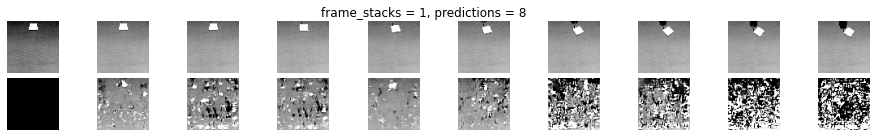

MSE of predictions:  [ 71.54581  123.348816 647.00854  649.2699   640.4929   634.68604
 625.8344   624.8973  ]


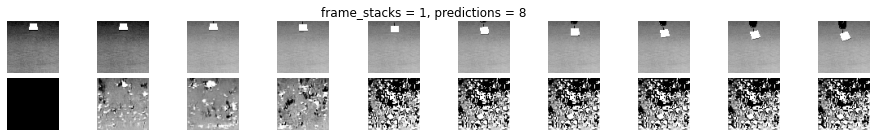

MSE of predictions:  [13.344965  13.213737  14.1274185 15.416943  21.175972  22.730595
 22.03537   28.942669 ]


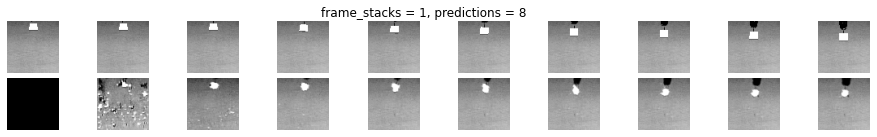

MSE of predictions:  [10.637146 14.115253 18.174213 14.652397 16.355803 14.779488 12.713989
 55.767906]


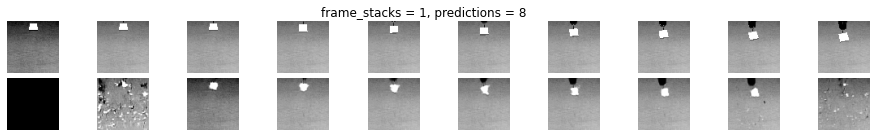

Loading models in path:  /home/olimoyo/visual-haptic-dynamics/saved_models/vaughan/osc/lm_ul_osc_v_r0.95_kl0.80_lr3e4
MSE of predictions:  [ 5.868899 12.941422 14.530011 10.523123 18.003918 28.263327 24.065384
 26.386587]


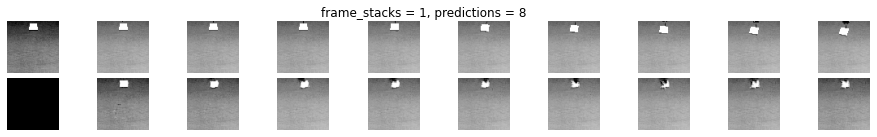

MSE of predictions:  [ 5.683476 11.089934 17.625427 20.658861 23.89592  24.733461 25.010622
 28.926325]


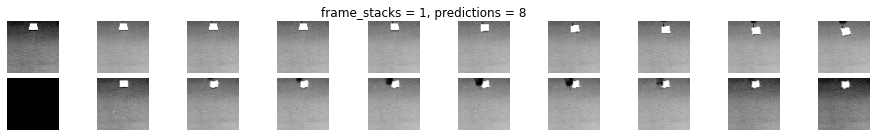

MSE of predictions:  [ 6.0005474 12.4596195 25.766708  19.632248  22.283344  19.702553
 19.119556  25.330627 ]


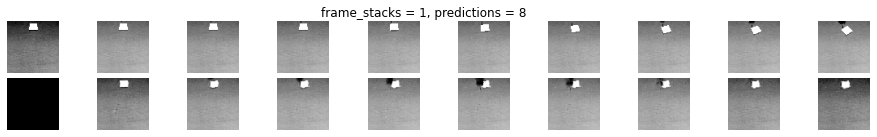

MSE of predictions:  [ 6.1337557 11.756281  12.060281  18.670004  18.862091  20.86313
 24.506723  28.25234  ]


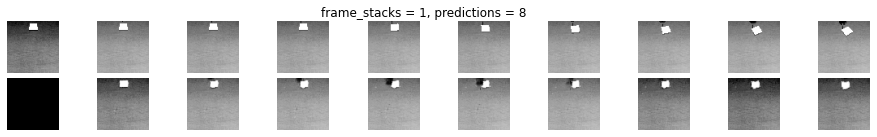

MSE of predictions:  [ 6.055549 13.108259 15.029787 21.298128 18.745413 20.391548 27.747242
 29.706083]


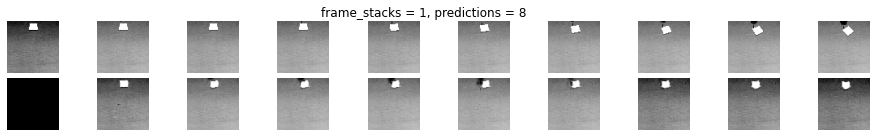

Loading models in path:  /home/olimoyo/visual-haptic-dynamics/saved_models/vaughan/osc/lm_ul_osc_v_r1.00_kl1.50_lr3e3
MSE of predictions:  [ 9.52725  10.917221 10.416913 13.98557  20.177599 25.606398 26.67148
 24.350576]


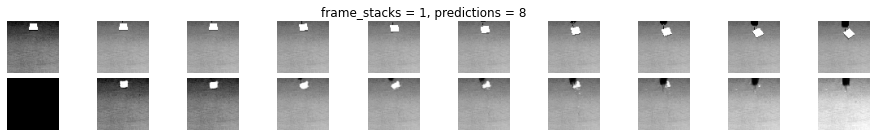

MSE of predictions:  [ 9.140202  10.6186285 10.1249695 14.22104   20.387941  26.700806
 28.365578  26.935513 ]


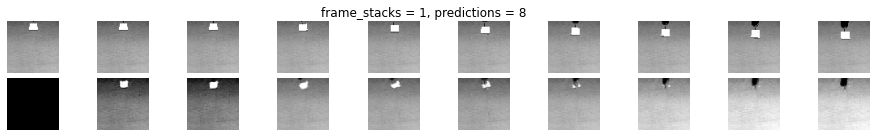

MSE of predictions:  [ 8.805568  6.700332  9.72151  16.847033 26.131002 33.960075 29.089546
 32.758003]


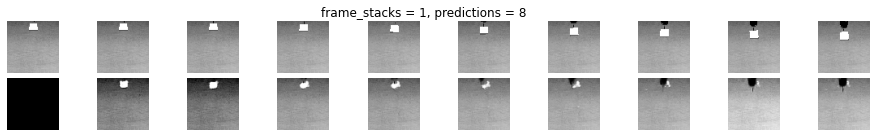

MSE of predictions:  [10.24562  15.558608 14.17898  20.730217 22.524658 32.408142 33.20293
 25.012981]


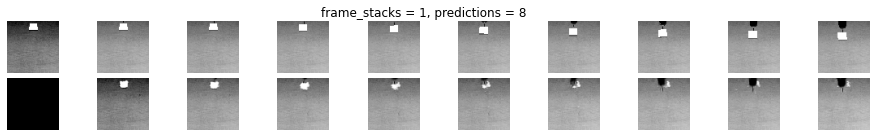

MSE of predictions:  [ 9.739309 10.520285 12.401317 20.995434 26.743366 28.747025 26.178738
 24.756636]


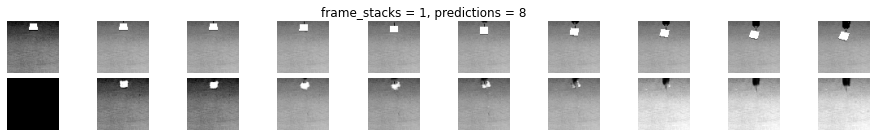

Loading models in path:  /home/olimoyo/visual-haptic-dynamics/saved_models/vaughan/osc/lm_ul_osc_vha_r1.50_kl1.00_lr3e4
MSE of predictions:  [ 5.84183    9.060842   8.828182   7.6513557 13.689824  24.856243
 27.277132  46.395157 ]


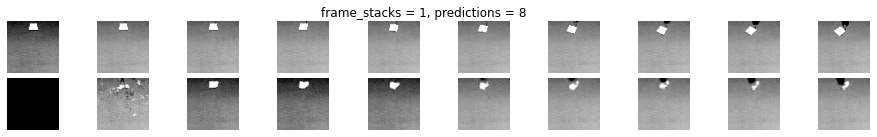

MSE of predictions:  [12.70725  30.04036  33.37966  19.719702 23.595318 28.112806 33.113064
 34.522907]


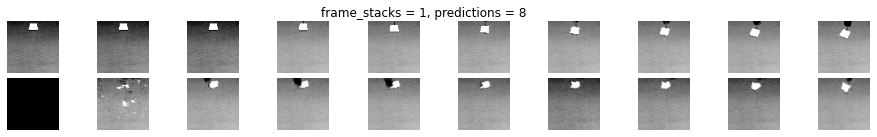

MSE of predictions:  [ 6.2218328 15.088301  27.923101  21.797617  28.690916  36.326504
 38.308437  39.72272  ]


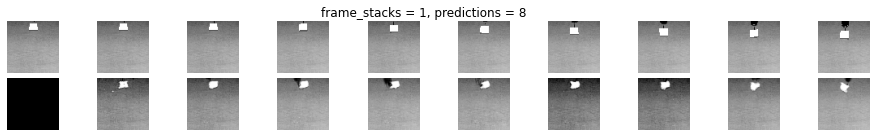

MSE of predictions:  [ 5.477706  7.101924  9.178707 19.496351 27.376705 31.55594  37.67892
 38.99509 ]


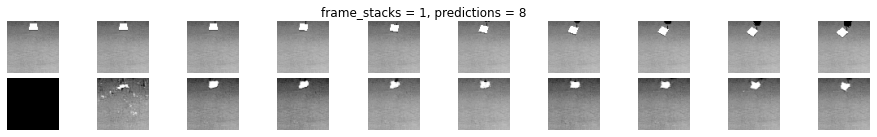

MSE of predictions:  [ 6.2969513  9.188594   8.960691  16.934462  27.060966  32.45273
 56.927723  68.554695 ]


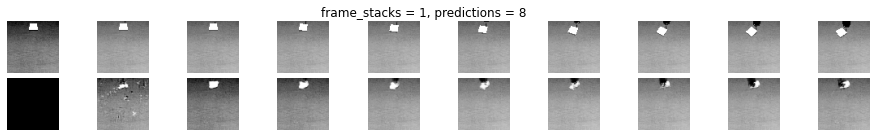

Loading models in path:  /home/olimoyo/visual-haptic-dynamics/saved_models/vaughan/osc/lm_ul_osc_vha_r1.00_kl1.50_lr3e4
MSE of predictions:  [ 7.1589513 13.260997  11.368827   9.555965  15.593087  30.096441
 45.05289   37.542305 ]


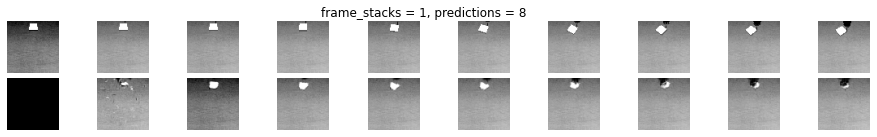

MSE of predictions:  [ 6.364546  10.674303   6.40721    9.454783  13.8805275 17.17845
 20.505377  22.558594 ]


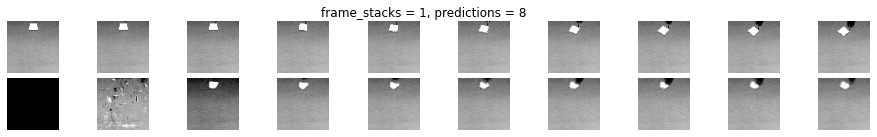

MSE of predictions:  [ 5.2018285 13.012907  11.375648   6.762119  11.177207  14.232246
 24.660334  26.90771  ]


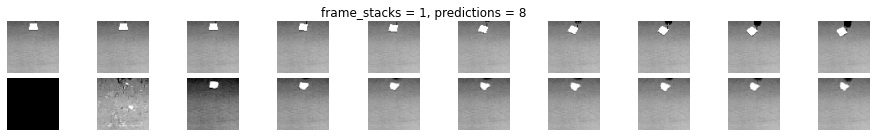

MSE of predictions:  [ 5.2315273  6.1955643 10.699517  22.76177   26.75078   26.44349
 35.910748  52.267998 ]


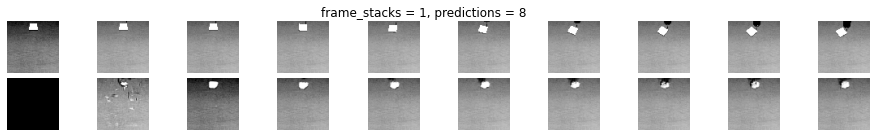

MSE of predictions:  [ 4.3106217  6.6013055  8.2583    19.96972   30.499802  36.297478
 45.462345  47.492374 ]


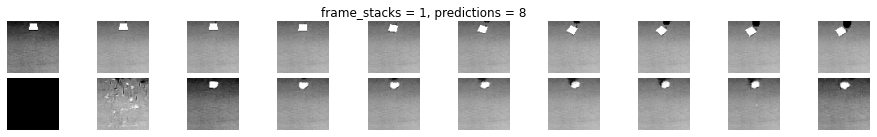

In [4]:
dict_of_models = load_models_dir(args.models_dir)

with torch.no_grad():
    for path, model_args in dict_of_models.items():
            
        nets = load_vh_models(path=path, args=model_args, mode='eval', device=args.device)

        if model_args.dim_x[0] == 1:
            imgs = data['img_gray']
        elif model_args.dim_x[0] == 3:
            imgs = data['img_rgb']
        
        total_len = imgs.shape[1]
        T = model_args.frame_stacks
        
        ii = np.random.randint(imgs.shape[0] // args.n_examples)
        batch_range = range(args.n_examples*ii, args.n_examples*(ii+1))
        start_idx = 0
        
        x = imgs[:, start_idx:][batch_range, :(T + 1 + args.n_pred)]
        x_i = imgs[:, start_idx:][batch_range, :(T + 1)] 
        x_i = frame_stack(x_i, frames=T)[:, 0] 

        if model_args.context=="initial_latent_state":
            ctx_img_i = x_i   

        x_ft_i = data['haptic'][:, start_idx:][batch_range, T:(T + 1)]
        x_arm_i = data['arm'][:, start_idx:][batch_range, T:(T + 1)]

        u = actions[:, start_idx:][
            batch_range, 
            (T + 1):(T + 1 + args.n_pred)
        ] 
            
        # Roll-out or predictions
        if model_args.context_modality != "none":
            if model_args.context_modality == "joint": 
                ctx_i = torch.cat((x_ft_i, x_arm_i), dim=-1) # (n, l, f, 12)
            elif model_args.context_modality == "ft": 
                ctx_i = x_ft_i
            elif model_args.context_modality == "arm":
                ctx_i = x_arm_i
            ctx_i = ctx_i.float().to(device=args.device) # (n, l, f, 6)
            ctx_i = ctx_i.transpose(-1, -2)
            ctx_i = ctx_i.reshape(-1, *ctx_i.shape[2:])  

        # Encode
        z_all_enc = []

        z_img = nets["img_enc"](x_i)
        z_all_enc.append(z_img)              

        if model_args.context_modality != "none":
            z_context = nets["context_enc"](ctx_i)
            z_all_enc.append(z_context)
        if model_args.context=="initial_latent_state":
            z_img_context = nets["context_img_enc"](ctx_img_i)
            z_all_enc.append(z_img_context)

        # Concatenate modalities and mix
        z_cat_enc = torch.cat(z_all_enc, dim=1)
        z_i, mu_z_i, logvar_z_i = nets["mix"](z_cat_enc)
        var_z_i = torch.diag_embed(torch.exp(logvar_z_i))
        h_i = None

        z_hat = torch.zeros((args.n_examples, (1 + args.n_pred), model_args.dim_z)).to(device=args.device)
        z_hat[:, 0] = z_i
        
        # Predict
        for jj in range(args.n_pred):
            z_ip1, mu_z_ip1, var_z_ip1, h_ip1 = nets["dyn"](
                z_t=z_i, 
                mu_t=mu_z_i, 
                var_t=var_z_i, 
                u=u[:, jj], 
                h_0=h_i, 
                single=True
            )

            z_hat[:, jj + 1] = mu_z_ip1
            z_i, mu_z_i, var_z_i, h_i = z_ip1, mu_z_ip1, var_z_ip1, h_ip1    
                    
        # Decode
        z_all_dec = []
        z_all_dec.append(z_hat)

        if model_args.context=="initial_latent_state" or model_args.context=="goal_latent_state":
            z_img_context_rep = z_img_context.unsqueeze(1).repeat(1, (args.n_pred + 1), 1)
            z_all_dec.append(z_img_context_rep)
        
        z_cat_dec = torch.cat(z_all_dec, dim=-1)
        
        x_hat = nets["img_dec"](z_cat_dec.reshape(-1, *z_cat_dec.shape[2:]))
        x_hat = x_hat.reshape(args.n_examples, (args.n_pred + 1), *x_hat.shape[1:])

        # Move to cpu, np
        x_hat = x_hat.cpu().numpy()
        x = x.cpu().numpy()
        mse = np.sum((x_hat[:, 1:, 1].reshape(args.n_examples, args.n_pred, -1) - 
                      x[:, 2:, 0].reshape(args.n_examples, args.n_pred, -1))**2, axis=2)

        # Plotting
        for bb in range(args.n_examples):
            columns = T + 1 + args.n_pred
            rows = 2
            fig=plt.figure(figsize=(16, 2))
            fig.suptitle('frame_stacks = {}, predictions = {}'.format(T, args.n_pred))
            for ii in range(columns*rows):
                if ii<((columns*rows)/2):
                    img = x[bb,ii,0,:,:]
                else:
                    idx = int(ii-((columns*rows)/2))
                    if idx < T:
                        img = np.zeros((model_args.dim_x[1], model_args.dim_x[2]))
                    else:
                        img = x_hat[bb,idx-1,0,:,:]
                fig.add_subplot(rows, columns, ii+1)
                plt.imshow(img, cmap="gray")
                
                plt.axis('off')
            print("MSE of predictions: ", mse[bb])
            plt.subplots_adjust(wspace=0.1, hspace=0.1)
            plt.show()